# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.2'

In [3]:
tf.keras.__version__

'2.9.0'

In [4]:
from numpy.random import RandomState
from sklearn.utils import shuffle

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11490434/11490434 [==============================] - 0s 0us/step
Prediction for Image-0 => 5
Prediction for Image-1 => 0
Prediction for Image-2 => 4
Prediction for Image-3 => 1
Prediction for Image-4 => 9
Prediction for Image-5 => 2
Prediction for Image-6 => 1
Prediction for Image-7 => 3
Prediction for Image-8 => 1


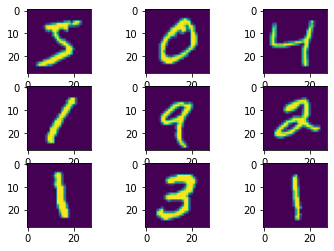

(60000, 28, 28)

In [5]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
    print('Prediction for Image-%s => %s' % (i, y_train_full[i]))
plt.show()

X_train_full.shape

In [6]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# shuffle the train data
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=RandomState())

In [8]:
# reshape dataset to have a single channel
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
print(np.max(X_train_full))
print(np.max(X_test))

255
255


In [12]:
# normalisation
X_train_full = X_train_full/np.max(X_train_full)
X_test = X_test/np.max(X_test)

In [13]:
# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

In [14]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28, 1)
(55000, 28, 28, 1)
(5000, 10)
(55000, 10)


## Build and train the model

Build and train your model. 

In [15]:
# TODO: Build your model
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [17]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [18]:
#do not need too much data to get enough acc rate

indices = tf.range(start=0, limit=tf.shape(X_train_full)[0], dtype=tf.int32)
idx = tf.random.shuffle(indices)

X_train= tf.gather(X_train_full,idx)[:20000]
y_train= tf.gather(y_train_full,idx)[:20000]

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/20
313/313 [==============================] - 11s 5ms/step - loss: 0.8111 - accuracy: 0.7337 - val_loss: 0.1470 - val_accuracy: 0.9626
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 0.2776 - accuracy: 0.9230 - val_loss: 0.0950 - val_accuracy: 0.9724
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 0.1979 - accuracy: 0.9487 - val_loss: 0.0946 - val_accuracy: 0.9772
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 0.1581 - accuracy: 0.9585 - val_loss: 0.0809 - val_accuracy: 0.9808
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 0.1371 - accuracy: 0.9635 - val_loss: 0.0689 - val_accuracy: 0.9824
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.1105 - accuracy: 0.9700 - val_loss: 0.0614 - val_accuracy: 0.9858
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.0987 - accuracy: 0.9739 - val_loss: 0.0690 - val_accuracy: 0.9838
Epoch

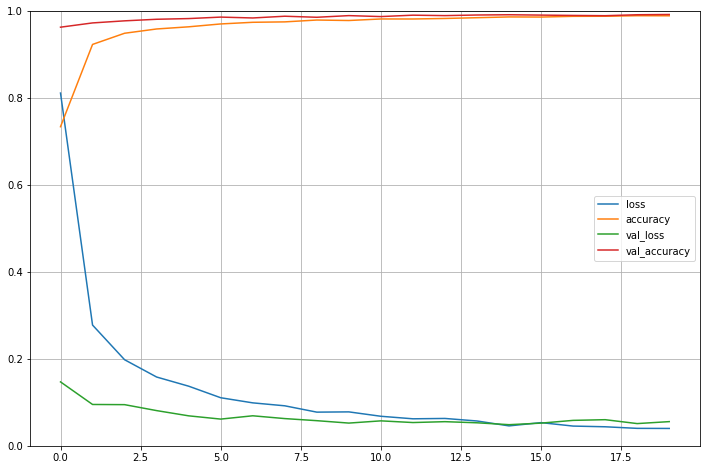

In [20]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [21]:
model.save('FDS22-M123-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [22]:
model = keras.models.load_model("FDS22-M123-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9894


[0.04995708540081978, 0.9894000291824341]

## Short report
We firstly import all needed packages and checl the version of tensorflow and keras.

And then for the dataset, after shuffling the full training data, we reshape the independent variable - X to make them have a single channel. Also, the dependent variable - y it's turned into one-hot encoding according to its 10 classes. Then after normalizing the full independent variable, they are splited into train and valid datasets.

We use several layers to build the model. Two Conv layers, two pooling layers, one Flatten layer, three fully connected layers, and two forget layers.

When training model, we reduce the number of training data. The total number in X_training is 55000, and we only use about one third. That's enough for training.

Due to small model size and training data, the training session is quite smooth and quick. The result of evaluation is 99.04%